<a href="https://colab.research.google.com/github/vishwanaik15/CIFAR-10/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [202]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline
from torch import nn
import torch.nn.functional as F
import torch.optim as optim


Import CIFAR-10 Dataset

1.Load the CIFAR10 training and test datasets using torchvision.                        
2.Normalize data for model.


In [203]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Visualize 4 Random Training Images

Images Shape :  (3, 32, 32)


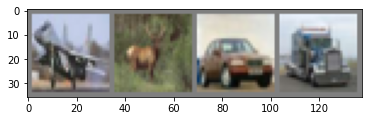

plane  deer   car truck


In [204]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# image shape
image_shape = images.numpy().shape[1:]
print("Images Shape : ", image_shape)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [205]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


Define CNN (Convolutional Neural Network)

What is CNN?                                                                     
-A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm   which can take in an input image, assign importance (learnable weights and  biases) to various aspects/objects in the image and be able to differentiate  one from the other.

-->The CNN flows below layout to train the model.

Input > Conv (ReLU) > MaxPool > Conv (ReLU) > MaxPool > FC (ReLU) > FC (ReLU) > > 10 outputs

Here, Conv is convolutional layer                                                
      RelU is a activation funtion.                                              
      Maxpool is a pooling layer                                                 
      FC is a fully connected layer                                              

What is RelU activation function?                                                
-The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.                                                  
-The Problem with ReLU fuction is it immediately converts the negative value to zero which some time is not a fit option for some datasets.                                                                       

There are other activation fuctions also like: Sigmoid Activation Function, Leaky ReLU

--------------------------------------------------------------------------------

Network training topology for 2 layers CNN.

In [206]:
import torch.nn as nn
import torch.nn.functional as F


class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net2 = Net2()
net2 = net2.to(device)

Network training topology for 3 layer CNN.

In [207]:
import torch.nn as nn
import torch.nn.functional as F


class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3,padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3,padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3,padding=1)
        self.fc1 = nn.Linear(64 * 4 * 4, 500)
        self.fc2 = nn.Linear(500, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net3 = Net3()
net3 = net3.to(device)

Network training topology for 4 layer CNN.

In [246]:
import torch.nn as nn
import torch.nn.functional as F


class Net4(nn.Module):
    def __init__(self):
        super(Net4, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5, padding=4)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 18, 5, padding=4)
        self.conv3 = nn.Conv2d(18, 30, 5,padding=4)
        self.conv4 = nn.Conv2d(30, 48, 5,padding=4)
        self.fc1 = nn.Linear(48 * 5 * 5, 500)
        self.fc2 = nn.Linear(500, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(-1, 48 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net4 = Net4()
net4 = net4.to(device)

 Define a Loss function and optimizer

 For this model I have used  Cross-Entorpy loss function Since I am  classifying images into more than two classes we will use cross-entropy as a loss function. To optimize the network I will employ stochastic gradient descent (SGD) with momentum .

What is  SGD?                                                                     
Stochastic gradient descent (often abbreviated SGD) is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable). It can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data). Especially in high-dimensional optimization problems this reduces the computational burden, achieving faster iterations in trade for a lower convergence rate.
 
 Different optimizer:                                                                                                                                                       
1.torch.optim.Adagrad                                                             
2.torch.optim.Adam                                                                 
3.torch.optim.Adamax                                                                
4.torch.optim.ASGD                                                                 
5.torch.optim.LBFGS                                                                   
6.torch.optim.RMSProp                                                              
7.torch.optim.Rprop                                                                
8.torch.optim.SGD                                                                  


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

-->Train the network: (2 layer)
 
 I have used SGD optimizer to tain 2 layer CNN.

In [209]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net2.parameters(), lr=0.001, momentum=0.9)

In [210]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.217
[1,  4000] loss: 1.864
[1,  6000] loss: 1.661
[1,  8000] loss: 1.549
[1, 10000] loss: 1.514
[1, 12000] loss: 1.481
[2,  2000] loss: 1.400
[2,  4000] loss: 1.359
[2,  6000] loss: 1.364
[2,  8000] loss: 1.341
[2, 10000] loss: 1.319
[2, 12000] loss: 1.311
Finished Training


-->Test the netwok:

In [211]:
PATH = './cifar_net.pth'
torch.save(net2.state_dict(), PATH)

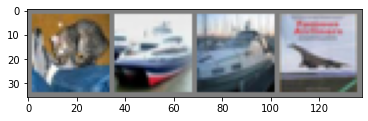

GroundTruth:    cat  ship  ship plane


In [212]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [213]:
net2 = Net2()
net2.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [214]:
outputs = net2(images)

In [215]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   frog   car  ship plane


In [216]:
outputs = model(images)

Accuracy of 2 layer netwok topology:(SGD)

In [261]:
accuracy = []
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

accuracy.append(100*(correct/total))

Accuracy of the network on the 10000 test images: 55 %


Now let's see what are the classes performed with highest accuracy

In [218]:
class_correct = list(0 for i in range(10))
class_total = list(0 for i in range(10))
class_accuracy = list(0 for i in range(10))

def accuracy_of_classes(net, dataloader):
  with torch.no_grad():
    for data in dataloader:
      images, labels = data
      outputs = net2(images)
      _, predicted = torch.max(outputs, 1)
      c = (predicted == labels).squeeze()
      for i in range(4):
        label = labels[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1

  for i in range(10):
    class_accuracy[i] = 100 * class_correct[i] / class_total[i]
    print('Accuracy of %5s : %2d %%' %(classes[i], 100 * class_correct[i] / class_total[i]))

In [219]:
accuracy_of_classes(model, testloader)

Accuracy of plane : 58 %
Accuracy of   car : 76 %
Accuracy of  bird : 40 %
Accuracy of   cat : 12 %
Accuracy of  deer : 54 %
Accuracy of   dog : 50 %
Accuracy of  frog : 72 %
Accuracy of horse : 66 %
Accuracy of  ship : 65 %
Accuracy of truck : 53 %


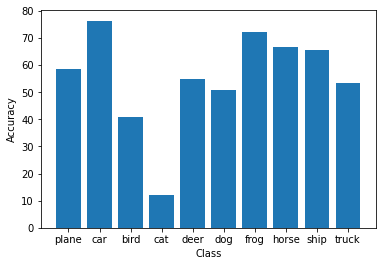

In [220]:
plt.bar(classes, class_accuracy)
plt.xlabel("Class")
plt.ylabel("Accuracy")
plt.show()

-->Train the netwok for 3 layer topology:

In [221]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net3.parameters(), lr=0.001)

In [222]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.811
[1,  4000] loss: 1.494
[1,  6000] loss: 1.362
[1,  8000] loss: 1.264
[1, 10000] loss: 1.215
[1, 12000] loss: 1.145
[2,  2000] loss: 1.063
[2,  4000] loss: 1.018
[2,  6000] loss: 1.016
[2,  8000] loss: 0.995
[2, 10000] loss: 0.972
[2, 12000] loss: 0.997
Finished Training


Accuracy for 3 layer Network :(Adam)

In [262]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the 3 layer network on the 10000 test images: %d %%' % (
    100 * correct / total))

accuracy.append(100*(correct/total))

Accuracy of the 3 layer network on the 10000 test images: 66 %


Now let's see what are the classes performed highest accuracy

In [224]:
class_correct = list(0 for i in range(10))
class_total = list(0 for i in range(10))
class_accuracy = list(0 for i in range(10))

def accuracy_of_classes(net, dataloader):
  with torch.no_grad():
    for data in dataloader:
      images, labels = data
      outputs = net3(images)
      _, predicted = torch.max(outputs, 1)
      c = (predicted == labels).squeeze()
      for i in range(4):
        label = labels[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1

  for i in range(10):
    class_accuracy[i] = 100 * class_correct[i] / class_total[i]
    print('Accuracy of %5s : %2d %%' %(classes[i], 100 * class_correct[i] / class_total[i]))

In [225]:
accuracy_of_classes(model, testloader)

Accuracy of plane : 72 %
Accuracy of   car : 85 %
Accuracy of  bird : 34 %
Accuracy of   cat : 40 %
Accuracy of  deer : 48 %
Accuracy of   dog : 63 %
Accuracy of  frog : 86 %
Accuracy of horse : 77 %
Accuracy of  ship : 79 %
Accuracy of truck : 72 %


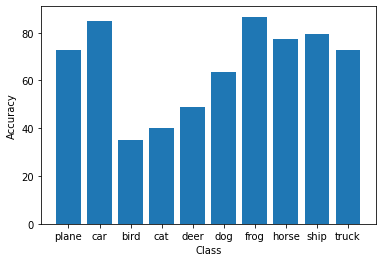

In [226]:
plt.bar(classes, class_accuracy)
plt.xlabel("Class")
plt.ylabel("Accuracy")
plt.show()

-->Train the netwok for 4 layer topology:

In [257]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net4.parameters(), lr=0.001, momentum=0.9)

In [258]:
for epoch in range(2):  # loop over the dataset multiple times
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net4(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.347
[1,  4000] loss: 1.320
[1,  6000] loss: 1.280
[1,  8000] loss: 1.290
[1, 10000] loss: 1.277
[1, 12000] loss: 1.286
[2,  2000] loss: 1.231
[2,  4000] loss: 1.264
[2,  6000] loss: 1.246
[2,  8000] loss: 1.233
[2, 10000] loss: 1.230
[2, 12000] loss: 1.223
Finished Training


Accuracy for 4 layer Network :(Adamax)

In [263]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net4(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the 4 layer network on the 10000 test images: %d %%' % (
    100 * correct / total))

accuracy.append(100*(correct/total))

Accuracy of the 4 layer network on the 10000 test images: 54 %


Now let's see what are the classes performed highest accuracy:

In [195]:
class_correct = list(0 for i in range(10))
class_total = list(0 for i in range(10))
class_accuracy = list(0 for i in range(10))

def accuracy_of_classes(net, dataloader):
  with torch.no_grad():
    for data in dataloader:
      images, labels = data
      outputs = net3(images)
      _, predicted = torch.max(outputs, 1)
      c = (predicted == labels).squeeze()
      for i in range(4):
        label = labels[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1

  for i in range(10):
    class_accuracy[i] = 100 * class_correct[i] / class_total[i]
    print('Accuracy of %5s : %2d %%' %(classes[i], 100 * class_correct[i] / class_total[i]))

In [265]:
accuracy_of_classes(model, testloader)

Accuracy of plane : 72 %
Accuracy of   car : 85 %
Accuracy of  bird : 34 %
Accuracy of   cat : 40 %
Accuracy of  deer : 48 %
Accuracy of   dog : 63 %
Accuracy of  frog : 86 %
Accuracy of horse : 77 %
Accuracy of  ship : 79 %
Accuracy of truck : 72 %


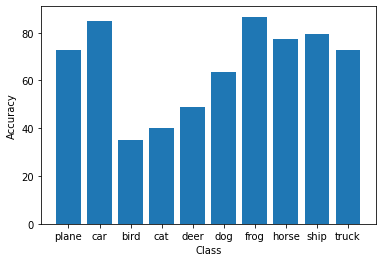

In [266]:
plt.bar(classes, class_accuracy)
plt.xlabel("Class")
plt.ylabel("Accuracy")
plt.show()

Bar graph for Accuracy performance of different layers

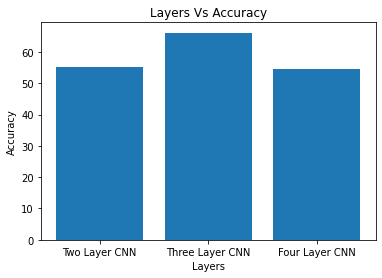

In [264]:
layers = ['Two Layer CNN', 'Three Layer CNN', 'Four Layer CNN']

plt.bar(layers, accuracy)
plt.title('Layers Vs Accuracy')
plt.xlabel('Layers')
plt.ylabel('Accuracy')
plt.show()

Goal:                                                                            
Creat a different 2 , 3 and 4 layer netwok topolgy and use different optimizer to increase the accuracy of the image classifier.

Challenges:                                                                      
While I was constructing network topology for different layers, I got to know about how dimensions works for different layers and got to knbow about Maxpool,padding in Cov2d network. I was also confused about different optimizers but then reading blogs online I got to know about how different optimizers works and trains the model.

Accuracy:

At first with two layers I was getting 55% accuracy.After adding one more layer it increased to 66% amd with 4 layers I got 54% accuracy.



References:

1.https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html                                                                                                                 


2.Optimzer[https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6#:~:text=Optimizers%20are%20algorithms%20or%20methods,order%20to%20reduce%20the%20losses.&text=Optimization%20algorithms%20or%20strategies%20are,the%20most%20accurate%20results%20possible.]
3.Conv2d[https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html]


4.Pooling Layer[https://www.geeksforgeeks.org/cnn-introduction-to-pooling-layer/]                                                                                
5.Fully connected layers[https://towardsdatascience.com/convolutional-neural-network-17fb77e76c05]                                       
6.https://medium.com/swlh/image-classification-with-cnn-4f2a501faadb                                      

7.https://www.stefanfiott.com/machine-learning/cifar-10-classifier-using-cnn-in-pytorch/                           

8.https://towardsdatascience.com/pytorch-basics-how-to-train-your-neural-net-intro-to-cnn-26a14c2ea29

My Work
